In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Version 7.000


In [13]:
N=50
C=1
xmin=-0.5
xmax=0.5
ymin=-0.5
ymax=0.5
dx = (xmax-xmin)/N
dy = (xmax-xmin)/N
dt = 0.5*np.min([dx,dy])
t0 = 0
tfinal=1

In [14]:
x = np.arange(xmin,xmax,dx)
y = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(x,y)
t = np.arange(t0,tfinal,dt)
print len(t)

100


In [27]:
f=2

PSI0=1*(np.sin(np.pi*f*(X))**2)*(np.sin(np.pi*f*(Y))**2)
RHO0=np.zeros_like(PSI0)
U0=np.array([PSI0,RHO0])

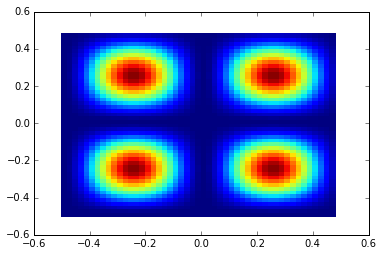

In [28]:
plt.pcolor(X,Y,PSI0,vmin=0,vmax=1)

In [29]:
def lapplacian(T):
    Ttemp = np.zeros((N+2,N+2))
    Ttemp[1:-1,1:-1]=T[:,:]
    Ttemp[0,1:-1]=T[-1,...]
    Ttemp[-1,1:-1]=T[0,...]
    Ttemp[1:-1,0]=T[...,-1]
    Ttemp[1:-1,-1]=T[...,0]
    out = np.zeros_like(T)
    out += (Ttemp[2:,1:-1]+Ttemp[:-2,1:-1]-2*Ttemp[1:-1,1:-1])/(dx**2)
    out += (Ttemp[1:-1,2:]+Ttemp[1:-1,:-2]-2*Ttemp[1:-1,1:-1])/(dy**2)
    return out

In [49]:
def rhs(U):
    psi = U[0]
    rho = U[1]
    dpsi = rho
    drho = C*C*lapplacian(psi)
    return np.array([dpsi,drho])

In [50]:
U.shape

(100, 2, 50, 50)

In [51]:
U = np.empty((len(t),2,N,N))
U[0] = U0
for i in range(len(t)-1):
    K1 = U[i] + 0.5*dt*rhs(U[i])
    U[i+1] = U[i] + dt*rhs(K1)

In [71]:
def makefig(i):
    freq=3
    itrue=i/freq
    plt.pcolor(X,Y,U[i,0],vmin=0,vmax=1)
    plt.axis('off')
    plt.savefig('wave_evolution_{}.png'.format(itrue),bbox_inches='tight')

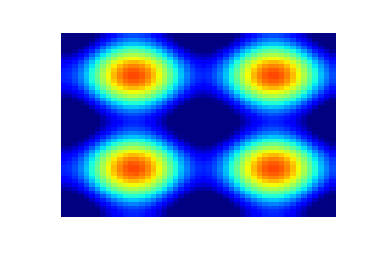

In [73]:
for i in range(0,100,3):
    makefig(i)

In [70]:
for i in range(0,100,3):
    print i, i/3

0 0
3 1
6 2
9 3
12 4
15 5
18 6
21 7
24 8
27 9
30 10
33 11
36 12
39 13
42 14
45 15
48 16
51 17
54 18
57 19
60 20
63 21
66 22
69 23
72 24
75 25
78 26
81 27
84 28
87 29
90 30
93 31
96 32
99 33


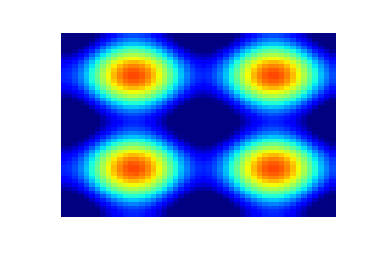

In [68]:
makefig(99)